# R Notebook Example (EITI)

Quick proof-of-concept for running a Jupyter notebook against an R kernal.

## General Setup
Assuming that you already have Jupyter installed:

1. [Install R](https://www.r-project.org/ "R - Getting Started")
2. [Install IRkernal](http://irkernel.github.io/ "IRkernal - Native R kernal for Jupyter")
3. Start a Jupyter notebook server
4. When click the _New_ button, R should now appear as a notebook option

## This Notebook
This notebook uses the following R packages. The statebins package needs to be installed from GitHub b/c the latest release (which support Puerto Rico) isn't on CRAN.

1. [Statebins](https://github.com/hrbrmstr/statebins "Statebins R package on GitHub"), which installs a few dependencies
2. [rPython](https://cran.r-project.org/web/packages/rPython/index.html "rPython package on CRAN")

In [1]:
#load statebins and check the version...as of August 2015, 1.2.1 is the latest
library(statebins)
packageVersion('statebins')

Loading required package: ggplot2
Loading required package: grid
Loading required package: gridExtra
Loading required package: scales
Loading required package: RColorBrewer


[1] ‘1.2.1’

## Statebins

Try out an R state mapping package using Natural Resource Revenues from U.S. Federal Lands data (_i.e._, the EITI project).

We're using the total revenues by location download (onshore data, calendar year 2013). [Visit the website](https://useiti.doi.gov/data/#location "EITI") to learn more about this data.

In [2]:
eiti <- read.csv(
        "https://useiti.doi.gov/static/data/CY13_Federal_Onshore_Revenues_by_State_12-04-2014.csv",
        skip = 2)
eiti <- aggregate(Revenue ~ State, eiti, sum)
eiti$State <- as.character(eiti$State)
eiti$Revenue <- eiti$Revenue / 1000000

# merge in missing states so we have a complete list
library("datasets")
states = data.frame(state.name)
eiti = merge(eiti, states, by.x = "State", by.y = "state.name", all=TRUE)
#eiti[is.na(eiti)] <- 0
head(eiti)

,State,Revenue
1,Alabama,4.33871
2,Alaska,19.90217
3,Arizona,0.06382765
4,Arkansas,5.567964
5,California,206.843
6,Colorado,299.5685


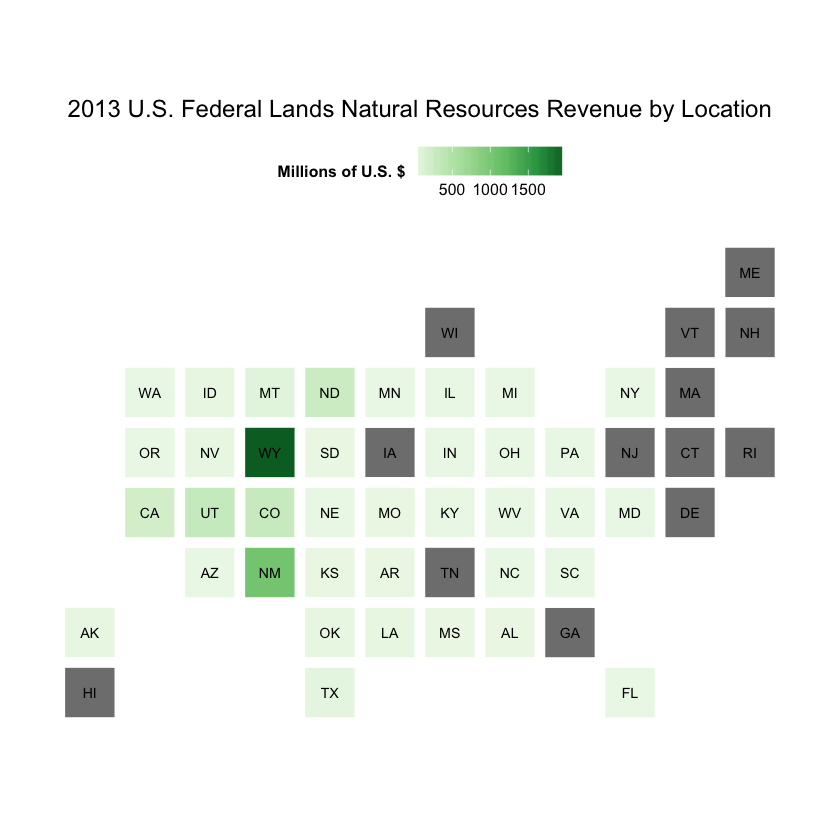

In [3]:
eitiplot <- statebins_continuous(eiti, "State", "Revenue",
                font_size=3, 
                brewer_pal="Greens", text_color="black", 
                plot_title="2013 U.S. Federal Lands Natural Resources Revenue by Location", 
                title_position="top", legend_title = "Millions of U.S. $")
plot(eitiplot)